In [24]:
# importing dependencies
import pytrends
from pytrends.request import TrendReq
import pandas as pd
from datetime import date, datetime, timedelta

In [25]:
# Specify the parameters to your liking
start_date= date(2011, 4, 1) # specify your start date
end_date= date(2021, 4, 1) # specify your end date
key_word = 'bitcoin' # use one key word
_cat = 0 # Category to narrow down your results
_geo = '' # Two letter country abbreviation
_gprop = '' # What Google property to filter to (e.g 'images')
_hl = 'en-US' # Specify Language and Region
_tz = 360 # specify your time-zone

In [26]:
# Source for this function: https://stackoverflow.com/questions/10688006/generate-a-list-of-datetimes-between-an-interval
def perdelta(start, end, delta):
    curr = start
    while curr < end:
        yield curr
        curr += delta

In [27]:
# generating a list of dates with 90 day intervals
dates=[]
for res in perdelta(start_date, end_date, timedelta(days=180)):
    dates.append(res)  
dates.append(end_date)

In [28]:
# gettingt the data for the individual time frames and adding them to a list
appended_data = []
for i in range(len(dates)-1):
    try: 
        _timeframe = str(dates[i]) + ' ' + str(dates[i+1])
        totalTrend = TrendReq(hl=_hl, tz=_tz)
        totalTrend.build_payload([key_word], cat=_cat, timeframe=_timeframe, geo=_geo, gprop=_gprop)
        totalTrend = totalTrend.interest_over_time()
        appended_data.append(totalTrend)
    except KeyError: 
        print('Please specify the Parameters (e.g. Keyword)')
        break

In [6]:
# correcting the values of the individual time-frames
for i in range(len(appended_data)-1):
    x = appended_data[i][key_word].tail(1).values
    y = appended_data[i+1][key_word].head(1).values
    if x == 0 and y == 0:
        factor = 1
    elif x == 0:
        factor = 0.5/y
    elif y == 0:
        factor = x/0.5
    else:
        factor = x/y
    appended_data[i+1][key_word] = appended_data[i+1][key_word] * factor

In [7]:
# concatinating all the dfs to one complete dataframe
appended_df = pd.concat(appended_data, axis=0)

In [11]:
# deleting the duplicated indexes/rows
appended_df = appended_df[~appended_df.index.duplicated(keep='first')]

In [19]:
appended_df.head()

,bitcoin,isPartial
date,,
2011-04-01,3.0,False
2011-04-02,3.0,False
2011-04-03,3.0,False
2011-04-04,2.0,False
2011-04-05,3.0,False


In [12]:
appended_df['bitcoin'].describe()

count    3654.000000
mean      210.223990
std       331.105835
min         1.000000
25%        35.395382
50%        72.111382
75%       278.248643
max      3865.955942
Name: bitcoin, dtype: float64

In [14]:
# saving the daily data as a csv
appended_df.to_csv('btc_trends.csv')

In [15]:
import matplotlib.pyplot as plt

In [18]:
%matplotlib inline

In [22]:
appended_df.reset_index(inplace=True)

C:\Users\jainr\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\jainr\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\jainr\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


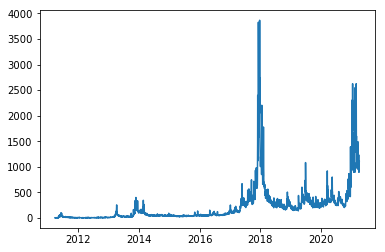

In [23]:
plt.plot(appended_df['date'], appended_df['bitcoin'])